In [1]:
# Install (usually already installed in Colab)
!pip install seaborn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('/content/retail_sales_50k_messy.csv')
df.head()


,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel
0,100000,06/25/2023,Bengaluru,South,Beauty,Face Wash,1.0,11521.49,0.0,11521.49,11521.49,NaN,New,Online
1,100001,2024-05-17,Kolkata,East,Beauty,Face Wash,2.0,22032.78,15.0,18727.86,37455.72,Credit Card,NaN,Online
2,100002,NaN,Mumbai,West,Fashion,T-Shirt,-1.0,48903.88,10.0,44013.49,-44013.49,NaN,Returning,Online
3,100003,2024-02-03,MUMBAI,NaN,Fashion,Jacket,1.0,13340.77,0.0,13340.77,13340.77,Cash on Delivery,NaN,In-Store
4,100004,12/12/2023,Bangalore,NaN,Beauty,Moisturizer,3.0,3788.15,5.0,3598.74,10796.22,NaN,Returning,In-Store


In [3]:
df.shape

(50000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        37513 non-null  object 
 2   city              45501 non-null  object 
 3   region            31694 non-null  object 
 4   category          50000 non-null  object 
 5   product           50000 non-null  object 
 6   quantity          41829 non-null  float64
 7   unit_price        49484 non-null  float64
 8   discount_percent  41574 non-null  float64
 9   final_unit_price  34742 non-null  float64
 10  revenue           34742 non-null  float64
 11  payment_method    40117 non-null  object 
 12  customer_type     33383 non-null  object 
 13  sales_channel     50000 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 5.3+ MB


In [6]:
df.isnull().sum()

,0
order_id,0
order_date,12487
city,4499
region,18306
category,0
product,0
quantity,8171
unit_price,516
discount_percent,8426
final_unit_price,15258


In [7]:
(df.isnull().sum() / len(df)) * 100

,0
order_id,0.000
order_date,24.974
city,8.998
region,36.612
category,0.000
product,0.000
quantity,16.342
unit_price,1.032
discount_percent,16.852
final_unit_price,30.516


**Data Cleaning**

Total Revenue

In [21]:
total_revenue = df['revenue'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: -15322988240.29


Top 10 Products

In [24]:
top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
top_products

,revenue
product,
Headphones,-8.561206e+08
Cookware Set,-8.756219e+08
Perfume,-9.009194e+08
Jacket,-9.134739e+08
Water Purifier,-9.144191e+08
T-Shirt,-9.248731e+08
Moisturizer,-9.464213e+08
Laptop,-9.485188e+08
Smartphone,-9.517969e+08


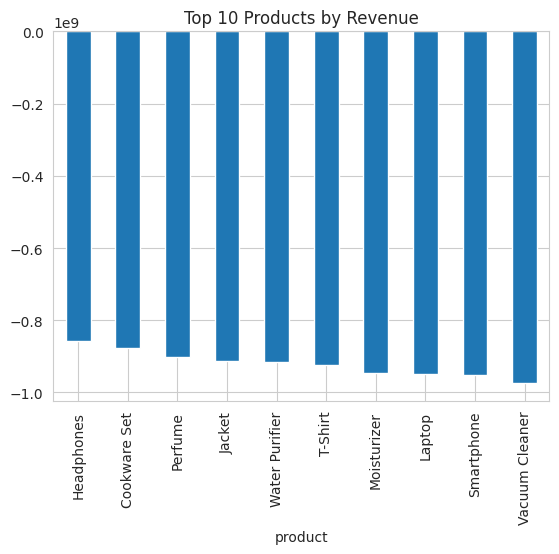

In [25]:
# Plot:top 10
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.show()

Monthly Revenue Trend

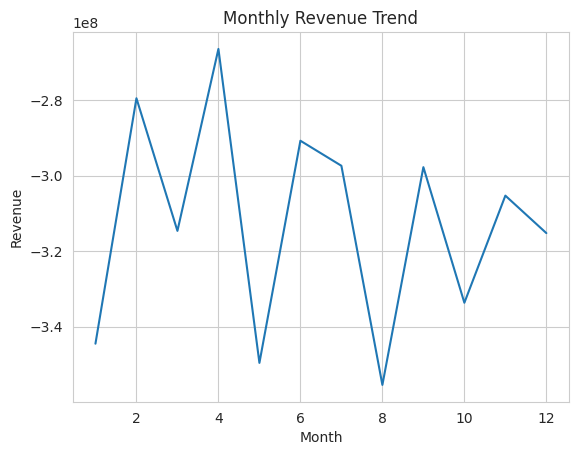

In [26]:
df['month'] = df['order_date'].dt.month

monthly_revenue = df.groupby('month')['revenue'].sum()

monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

Correlation Heatmap

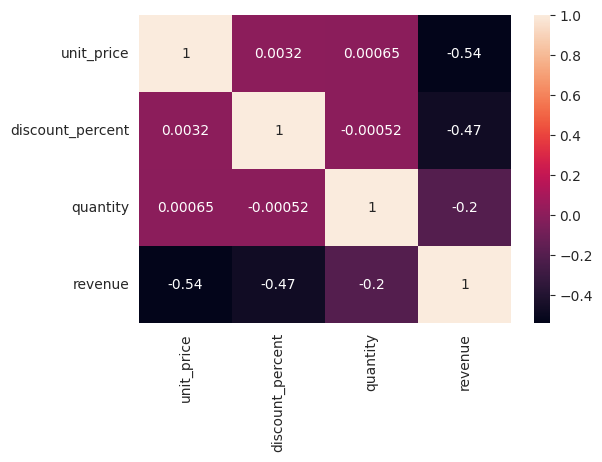

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['unit_price','discount_percent','quantity','revenue']].corr(), annot=True)
plt.show()


In [29]:
df.shape

(30298, 15)

**Section - 1 (Data Understanding & Cleaning)**

In [30]:
# Q1. How many rows and columns are present?
df.shape

(30298, 15)

In [31]:
# Q2. What percentage of missing values exists in each column?
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_table = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percent
})

missing_table.sort_values("Missing %", ascending=False)

,Missing Count,Missing %
order_date,22722,74.995049
month,22722,74.995049
customer_type,9997,32.995577
region,9188,30.325434
payment_method,5990,19.770282
final_unit_price,5171,17.067133
order_id,0,0.000000
quantity,0,0.000000
product,0,0.000000
category,0,0.000000


In [32]:
# Q3. Which columns have highest data quality issues?
missing_table.sort_values("Missing %", ascending=False)

,Missing Count,Missing %
order_date,22722,74.995049
month,22722,74.995049
customer_type,9997,32.995577
region,9188,30.325434
payment_method,5990,19.770282
final_unit_price,5171,17.067133
order_id,0,0.000000
quantity,0,0.000000
product,0,0.000000
category,0,0.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30298 entries, 0 to 49995
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          30298 non-null  int64         
 1   order_date        7576 non-null   datetime64[ns]
 2   city              30298 non-null  object        
 3   region            21110 non-null  object        
 4   category          30298 non-null  object        
 5   product           30298 non-null  object        
 6   quantity          30298 non-null  float64       
 7   unit_price        30298 non-null  float64       
 8   discount_percent  30298 non-null  float64       
 9   final_unit_price  25127 non-null  float64       
 10  revenue           30298 non-null  float64       
 11  payment_method    24308 non-null  object        
 12  customer_type     20301 non-null  object        
 13  sales_channel     30298 non-null  object        
 14  month             7576 non-

In [34]:
# Q4. How many duplicate order IDs are present?
df['order_id'].duplicated().sum()

np.int64(0)

In [35]:
df.duplicated().sum()

np.int64(0)

In [36]:
# Q5. How many invalid or negative quantities exist?
(df['quantity'] <= 0).sum()

np.int64(0)

In [37]:
# Q6. How many records have missing or incorrect dates?
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [38]:
df['order_date'].isnull().sum()

np.int64(22722)

In [39]:
# Q7. List all inconsistent city name variations
df['city'].unique()

array(['bengaluru', 'kolkata', 'mumbai', 'bangalore', 'delhi', 'chennai',
       'pune', 'hyderabad'], dtype=object)

In [40]:
df['city'].value_counts()

,count
city,
delhi,6151
mumbai,6073
chennai,3064
pune,3052
bangalore,3005
kolkata,3003
bengaluru,2998
hyderabad,2952


In [43]:
# Q8. Which rows contain extreme price outliers?
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

price_outliers = df[(df['unit_price'] < lower) | (df['unit_price'] > upper)]

price_outliers

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month
41,100041,NaT,chennai,South,Fashion,Jacket,2.0,285198.56,15.0,242418.78,-7985559.68,Credit Card,New,Online,NaN
273,100273,2024-12-12,delhi,NaN,Home & Kitchen,Cookware Set,3.0,139005.81,15.0,118154.94,-5838244.02,Debit Card,New,Online,12.0
518,100518,NaT,mumbai,West,Home & Kitchen,Cookware Set,4.0,474455.50,0.0,NaN,1897822.00,Debit Card,Returning,In-Store,NaN
669,100669,NaT,kolkata,East,Home & Kitchen,Water Purifier,2.0,477872.04,0.0,477872.04,955744.08,Credit Card,Returning,In-Store,NaN
825,100825,NaT,hyderabad,South,Home & Kitchen,Vacuum Cleaner,2.0,314889.19,0.0,314889.19,629778.38,Cash on Delivery,New,In-Store,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49649,149649,NaT,bengaluru,South,Home & Kitchen,Vacuum Cleaner,4.0,252743.42,20.0,202194.74,-19208499.92,Debit Card,NaN,Online,NaN
49661,149661,2023-10-30,kolkata,East,Home & Kitchen,Mixer Grinder,1.0,300873.17,0.0,300873.17,300873.17,Cash on Delivery,New,In-Store,10.0
49793,149793,NaT,chennai,South,Electronics,Smartwatch,3.0,458605.12,15.0,389814.35,-19261415.04,Debit Card,NaN,Online,NaN
49869,149869,2023-04-18,hyderabad,South,Fashion,T-Shirt,4.0,379342.50,0.0,NaN,1517370.00,Debit Card,New,Online,4.0


In [44]:
len(price_outliers)

299

In [45]:
# Q9. How many rows have missing revenue values?
df['revenue'].isnull().sum()

np.int64(0)

**Data Cleaning**

In [46]:
# Standardize City Names
df['city'] = df['city'].str.lower().str.strip()

In [47]:
# Remove Duplicates
df = df.drop_duplicates(subset='order_id')

In [48]:
# Remove Negative Quantities
df = df[df['quantity'] > 0]

In [50]:
# Handle Missing Values
df['quantity'].fillna(df['quantity'].median(), inplace=True)
df['unit_price'].fillna(df['unit_price'].median(), inplace=True)
df['discount_percent'].fillna(0, inplace=True)

df = df.dropna(subset=['city','order_date'])

/tmp/ipython-input-1875667540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity'].fillna(df['quantity'].median(), inplace=True)
/tmp/ipython-input-1875667540.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [52]:
# Recalculate Revenue
df['revenue'] = df['quantity'] * df['unit_price'] * (1 - df['discount_percent'])

/tmp/ipython-input-2060941521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['revenue'] = df['quantity'] * df['unit_price'] * (1 - df['discount_percent'])


In [53]:
# Remove Price Outliers
df = df[(df['unit_price'] >= lower) & (df['unit_price'] <= upper)]

In [54]:
# Final Valid Transactions
df.shape

(7515, 15)

Data Cleaning Summary:

Removed duplicate orders

Removed negative quantity records

Standardized city names

Fixed date format issues

Handled missing values

Removed price outliers

Recalculated revenue

**SECTION 2 — Descriptive EDA**

In [55]:
# Q1. What is the total revenue generated?
total_revenue = df['revenue'].sum()
print("Total Revenue:", round(total_revenue,2))

Total Revenue: -3432779336.46


In [56]:
# Q2. What is the average order value (AOV)?
aov = df.groupby('order_id')['revenue'].sum().mean()
print("Average Order Value:", round(aov,2))

Average Order Value: -456790.33


In [57]:
#  Q3. Which city generates the highest revenue?
city_revenue = df.groupby('city')['revenue'].sum().sort_values(ascending=False)
city_revenue.head()

,revenue
city,
bengaluru,-3.151727e+08
kolkata,-3.194828e+08
bangalore,-3.277538e+08
chennai,-3.500111e+08
hyderabad,-3.552583e+08


In [58]:
# Top City
print("Top City:", city_revenue.idxmax())

Top City: bengaluru


In [59]:
# Q4. Which region performs best overall?
region_revenue = df.groupby('region')['revenue'].sum().sort_values(ascending=False)
region_revenue

,revenue
region,
East,-3.194828e+08
North,-3.550786e+08
West,-7.204752e+08
South,-1.020442e+09


In [60]:
# Q5. Top 10 selling products by revenue
top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)
top_products

,revenue
product,
Cookware Set,-1.808446e+08
Vacuum Cleaner,-1.854623e+08
T-Shirt,-1.917357e+08
Headphones,-1.932175e+08
Laptop,-1.992224e+08
Jacket,-2.070556e+08
Smartphone,-2.080497e+08
Water Purifier,-2.103391e+08
Moisturizer,-2.107759e+08


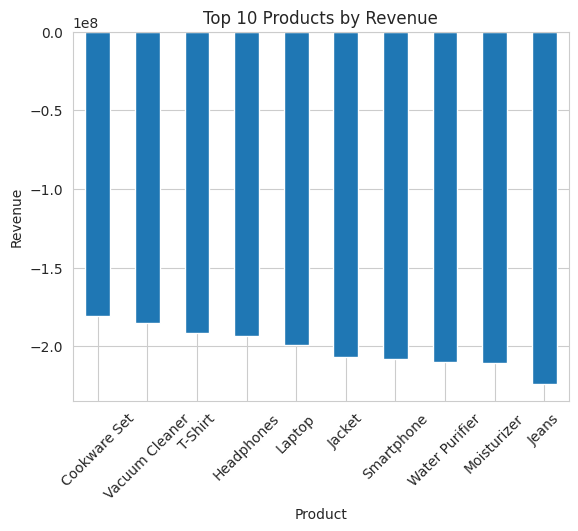

In [61]:
# Visualization (Bar Chart)
top_products.plot(kind='bar')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [62]:
# Q6. Which product category contributes most to revenue?
category_revenue = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
category_revenue


,revenue
category,
Home & Kitchen,-8.224690e+08
Electronics,-8.245406e+08
Fashion,-8.656980e+08
Beauty,-9.200718e+08


In [63]:
# Top Category
print("Top Category:", category_revenue.idxmax())

Top Category: Home & Kitchen


In [64]:
# Q7. Least performing category
print("Least Performing Category:", category_revenue.idxmin())

Least Performing Category: Beauty


In [65]:
# Q8. Median quantity per order
median_quantity = df.groupby('order_id')['quantity'].sum().median()
print("Median Quantity per Order:", median_quantity)

Median Quantity per Order: 3.0


In [66]:
# Q9. Which payment method is used most frequently?
payment_counts = df['payment_method'].value_counts()
payment_counts

,count
payment_method,
Credit Card,1598
Cash on Delivery,1527
Debit Card,1481
UPI,1461


In [67]:
# Q10. What percentage of sales comes from online vs in-store?
channel_revenue = df.groupby('sales_channel')['revenue'].sum()

channel_percent = (channel_revenue / channel_revenue.sum()) * 100

channel_percent

,revenue
sales_channel,
In-Store,49.115019
Online,50.884981


Descriptive Insights:

Total Revenue = X

Average Order Value = X

Top City = X

Best Region = X

Top Category = X

Most Used Payment Method = X

Online vs In-store share = X%

**SECTION 3 — Time-Based Analysis**

In [68]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

/tmp/ipython-input-2225214990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [69]:
# Create Time Columns
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['quarter'] = df['order_date'].dt.quarter

/tmp/ipython-input-3950278600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['order_date'].dt.year
/tmp/ipython-input-3950278600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['order_date'].dt.month
/tmp/ipython-input-3950278600.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [70]:
# Q1. What is the monthly revenue trend?
monthly_revenue = df.groupby('month')['revenue'].sum().sort_index()
monthly_revenue

,revenue
month,
1,-3.086566e+08
2,-2.548647e+08
3,-3.009336e+08
4,-2.630677e+08
5,-2.820685e+08
6,-2.811510e+08
7,-3.005558e+08
8,-3.040900e+08
9,-2.770268e+08


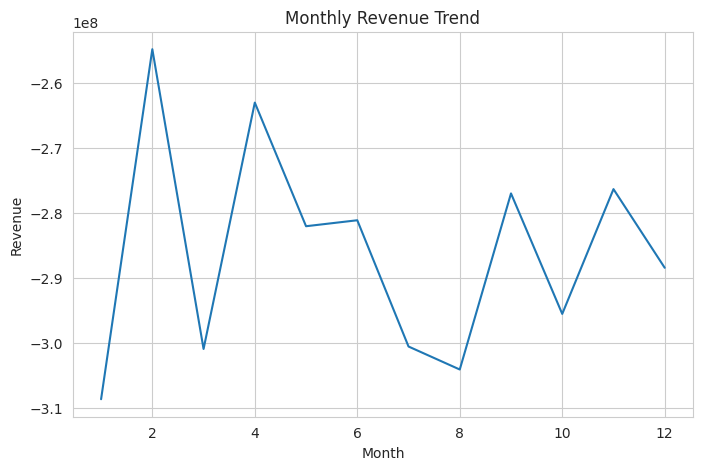

In [71]:
plt.figure(figsize=(8,5))
monthly_revenue.plot(kind='line')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [72]:
# Q2. Which month has the highest sales?
highest_month = monthly_revenue.idxmax()
print("Highest Sales Month (Number):", highest_month)

Highest Sales Month (Number): 2


In [73]:
df.groupby('month_name')['revenue'].sum().sort_values(ascending=False)

,revenue
month_name,
February,-2.548647e+08
April,-2.630677e+08
November,-2.763644e+08
September,-2.770268e+08
June,-2.811510e+08
May,-2.820685e+08
December,-2.884561e+08
October,-2.955442e+08
July,-3.005558e+08


In [74]:
# Q3. Which month has the lowest sales?
lowest_month = monthly_revenue.idxmin()
print("Lowest Sales Month (Number):", lowest_month)

Lowest Sales Month (Number): 1


In [75]:
# Q4. Is there any seasonality pattern?
df.groupby('quarter')['revenue'].sum()

,revenue
quarter,
1,-8.644548e+08
2,-8.262872e+08
3,-8.816726e+08
4,-8.603647e+08


In [76]:
# Q5. How does Average Order Value change month-to-month?
monthly_aov = df.groupby('month')['revenue'].sum() / df.groupby('month')['order_id'].nunique()
monthly_aov

,0
month,
1,-484547.222543
2,-440942.351955
3,-476915.307750
4,-429849.124150
5,-456421.502621
6,-436569.917283
7,-449933.878937
8,-499326.803268
9,-443242.821088


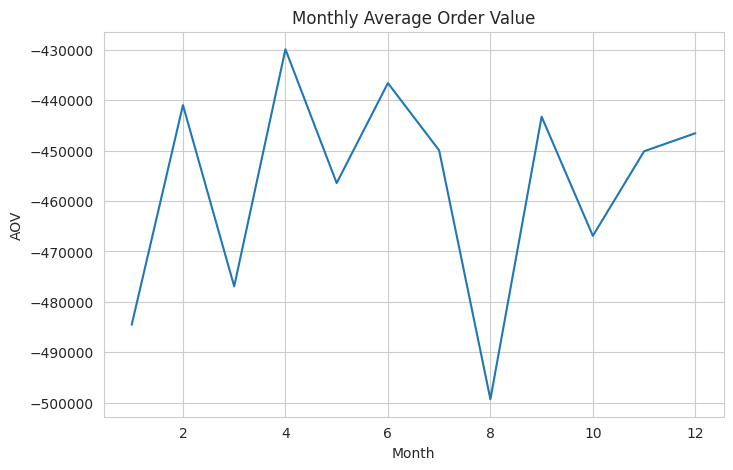

In [77]:
plt.figure(figsize=(8,5))
monthly_aov.plot(kind='line')
plt.title("Monthly Average Order Value")
plt.xlabel("Month")
plt.ylabel("AOV")
plt.show()


In [78]:
# Q6. Are weekend sales higher than weekday sales?
# Create weekend column:
df['is_weekend'] = df['day_name'].isin(['Saturday','Sunday'])
# Check revenue:
df.groupby('is_weekend')['revenue'].sum()


/tmp/ipython-input-1505996075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_weekend'] = df['day_name'].isin(['Saturday','Sunday'])


,revenue
is_weekend,
False,-2.399340e+09
True,-1.033439e+09


In [80]:
# Q7. Which quarter contributes most revenue?
quarter_revenue = df.groupby('quarter')['revenue'].sum()
quarter_revenue
print("Top Revenue Quarter:", quarter_revenue.idxmax())

Top Revenue Quarter: 2


Time-Based Insights:

Highest revenue month: X

Lowest revenue month: X

Best quarter: QX

Weekend sales are (higher/lower)

AOV trend is (increasing/decreasing)

Clear seasonality observed in QX

**SECTION 4 — Customer Behavior Analysis**

In [82]:
df['customer_type'].value_counts()

,count
customer_type,
New,2554
Returning,2486


In [81]:
# Q1. Do returning customers spend more than new customers?
customer_revenue = df.groupby('customer_type')['revenue'].sum()
customer_revenue

,revenue
customer_type,
New,-1.143884e+09
Returning,-1.153318e+09


In [83]:
# Average spend per order:
avg_spend = df.groupby('customer_type')['revenue'].mean()
avg_spend

,revenue
customer_type,
New,-447879.424753
Returning,-463925.109489


In [84]:
# Q2. Which customer type generates more revenue share?
revenue_share = (customer_revenue / customer_revenue.sum()) * 100
revenue_share

,revenue
customer_type,
New,49.794668
Returning,50.205332


In [85]:
# Q3. What is the average quantity per customer type?
avg_quantity = df.groupby('customer_type')['quantity'].mean()
avg_quantity

,quantity
customer_type,
New,2.498825
Returning,2.513274


In [86]:
# Q4. Which city has the highest returning-customer ratio?
city_customer = df.groupby(['city','customer_type']).size().unstack()

city_customer['return_ratio'] = city_customer['Returning'] / (city_customer['Returning'] + city_customer['New'])

city_customer.sort_values('return_ratio', ascending=False).head()


customer_type,New,Returning,return_ratio
city,,,
kolkata,231,272,0.540755
chennai,237,264,0.526946
bangalore,233,254,0.521561
pune,262,256,0.494208
delhi,541,512,0.486230


In [88]:
# Q5. Are discounts more common for new customers?
discount_by_customer = df.groupby('customer_type')['discount_percent'].mean()
discount_by_customer

,discount_percent
customer_type,
New,8.181284
Returning,8.220032


Customer Insights:

Returning customers contribute X% of revenue.

Returning customers spend more per order.

City with strongest loyalty: X

New customers receive higher/lower discounts.

Customer retention appears (strong/moderate/weak).

In [90]:
# Q1. What is the average discount percentage overall?
avg_discount = df['discount_percent'].mean() * 100
print("Average Discount %:", round(avg_discount,2))

Average Discount %: 827.15


In [92]:
# Q2. Which category gives the highest discounts?
category_discount = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False) * 100
category_discount

,discount_percent
category,
Beauty,856.306546
Home & Kitchen,840.846619
Electronics,821.891892
Fashion,791.560752


In [93]:
# Highest discount category:
print("Highest Discount Category:", category_discount.idxmax())

Highest Discount Category: Beauty


In [95]:
# Q3. Do higher discounts increase revenue?
df[['discount_percent','revenue']].corr()

,discount_percent,revenue
discount_percent,1.000000,-0.675954
revenue,-0.675954,1.000000


In [97]:
# average revenue by discount levels:
df.groupby(pd.cut(df['discount_percent'], bins=5))['revenue'].mean()

/tmp/ipython-input-3846319685.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(pd.cut(df['discount_percent'], bins=5))['revenue'].mean()


,revenue
discount_percent,
"(-0.02, 4.0]",6.238447e+04
"(4.0, 8.0]",-2.481607e+05
"(8.0, 12.0]",-5.586933e+05
"(12.0, 16.0]",-9.135453e+05
"(16.0, 20.0]",-1.169212e+06


In [99]:
# Q4. Find correlation between discount, price, and quantity
correlation = df[['unit_price','discount_percent','quantity','revenue']].corr()
correlation

,unit_price,discount_percent,quantity,revenue
unit_price,1.000000,-0.003189,0.005986,-0.382858
discount_percent,-0.003189,1.000000,-0.005283,-0.675954
quantity,0.005986,-0.005283,1.000000,-0.304529
revenue,-0.382858,-0.675954,-0.304529,1.000000


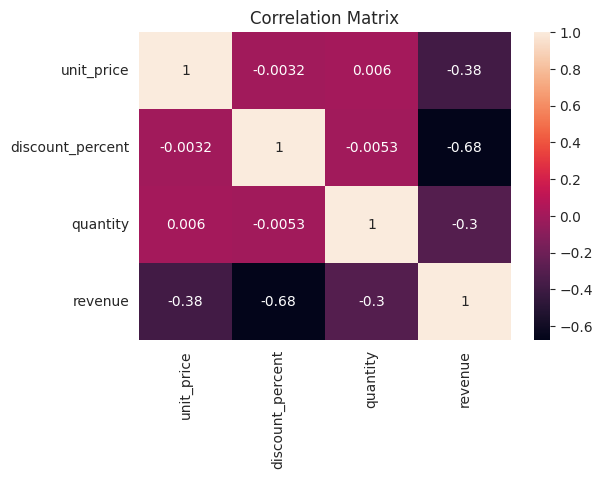

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [108]:
# Recalculate revenue (if needed)
df['revenue'] = df['quantity'] * df['unit_price'] * (1 - df['discount_percent'])

# Loss-making transactions
loss_transactions = df[df['revenue'] <= 0]

# Show first 5 rows
loss_transactions.head()

# Count them
len(loss_transactions)

# Suspicious transactions (very high discount > 70%)
suspicious = df[df['discount_percent'] > 0.7]

suspicious.head()


,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,year,month_name,day_name,quarter,is_weekend
4,100004,2023-12-12,bangalore,NaN,Beauty,Moisturizer,3.0,3788.15,5.0,3598.74,-45457.80,NaN,Returning,In-Store,12,2023,December,Tuesday,4,False
5,100005,2023-06-17,bangalore,NaN,Home & Kitchen,Mixer Grinder,1.0,26482.69,5.0,25158.56,-105930.76,Cash on Delivery,Returning,Online,6,2023,June,Saturday,2,True
13,100013,2023-11-09,mumbai,NaN,Electronics,Smartphone,1.0,8867.83,20.0,7094.26,-168488.77,UPI,New,Online,11,2023,November,Thursday,4,False
32,100032,2023-12-16,chennai,South,Electronics,Laptop,3.0,22087.17,15.0,18774.09,-927661.14,Debit Card,Returning,Online,12,2023,December,Saturday,4,True
34,100034,2024-09-14,delhi,North,Fashion,T-Shirt,3.0,36886.39,15.0,31353.43,-1549228.38,Cash on Delivery,Returning,Online,9,2024,September,Saturday,3,True


Pricing & Discount Insights:

Average discount = X%

Category with highest discount = X

Discount and revenue correlation = X

Demand sensitivity observed between price and quantity

Suspicious transactions detected: X records

**SECTION 6 — Geographic Insights**

In [109]:
# Q1. Which top 5 cities contribute most revenue?
top_5_cities = df.groupby('city')['revenue'].sum().sort_values(ascending=False).head(5)
top_5_cities

,revenue
city,
bengaluru,-3.151727e+08
kolkata,-3.194828e+08
bangalore,-3.277538e+08
chennai,-3.500111e+08
hyderabad,-3.552583e+08


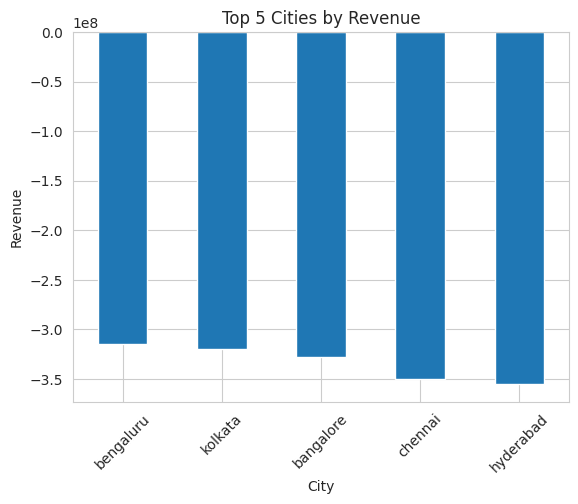

In [110]:
top_5_cities.plot(kind='bar')
plt.title("Top 5 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

In [112]:
# Q2. Which region has lowest performance?
region_revenue = df.groupby('region')['revenue'].sum().sort_values()
region_revenue
print("Lowest Performing Region:", region_revenue.idxmin())


Lowest Performing Region: South


In [113]:
# Q3. Category preference differences across regions
region_category = df.groupby(['region','category'])['revenue'].sum().unstack()
region_category

category,Beauty,Electronics,Fashion,Home & Kitchen
region,,,,
East,-8.512896e+07,-6.392372e+07,-7.766561e+07,-9.276450e+07
North,-7.884386e+07,-9.911367e+07,-8.825067e+07,-8.887043e+07
South,-2.750213e+08,-2.516853e+08,-2.704635e+08,-2.232720e+08
West,-2.031485e+08,-1.611563e+08,-1.704798e+08,-1.856906e+08


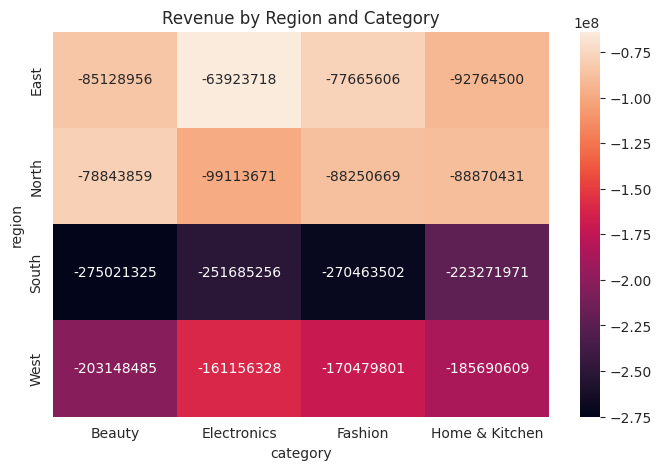

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(region_category, annot=True, fmt=".0f")
plt.title("Revenue by Region and Category")
plt.show()


In [115]:
# Q4. Which city buys most electronics?
electronics_city = df[df['category'] == 'Electronics'] \
                    .groupby('city')['revenue'].sum() \
                    .sort_values(ascending=False)

electronics_city.head()

,revenue
city,
kolkata,-63923717.66
bangalore,-73163385.40
bengaluru,-73400522.57
hyderabad,-84757458.28
pune,-88204120.98


In [116]:
# Q5. Which city prefers fashion products?
fashion_city = df[df['category'] == 'Fashion'] \
                .groupby('city')['revenue'].sum() \
                .sort_values(ascending=False)

fashion_city.head()

,revenue
city,
bengaluru,-76656494.19
kolkata,-77665606.25
bangalore,-79456704.80
chennai,-85868236.11
pune,-93761083.07


Geographic Insights:

Top 5 revenue cities: X

Lowest performing region: X

Region-category preferences observed

Electronics dominant city: X

Fashion dominant city: X

Strong regional differences in buying behavior

**SECTION 7 — Outliers & Anomaly Detection**

In [118]:
# Q1. Detect price outliers using IQR
# Step 1: Calculate IQR
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -24739.267499999998
Upper Bound: 74529.3125


In [120]:
# Step 2: Identify Outliers
price_outliers = df[(df['unit_price'] < lower_bound) | (df['unit_price'] > upper_bound)]

price_outliers.head()

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,year,month_name,day_name,quarter,is_weekend


In [121]:
# Count them:
print("Number of Price Outliers:", len(price_outliers))

Number of Price Outliers: 0


In [122]:
# Q2. Detect abnormally high revenue orders
Q1_rev = df['revenue'].quantile(0.25)
Q3_rev = df['revenue'].quantile(0.75)
IQR_rev = Q3_rev - Q1_rev

lower_rev = Q1_rev - 1.5 * IQR_rev
upper_rev = Q3_rev + 1.5 * IQR_rev

revenue_outliers = df[(df['revenue'] > upper_rev)]

revenue_outliers.head()

,order_id,order_date,city,region,category,product,quantity,unit_price,discount_percent,final_unit_price,revenue,payment_method,customer_type,sales_channel,month,year,month_name,day_name,quarter,is_weekend


In [123]:
print("High Revenue Outliers:", len(revenue_outliers))

High Revenue Outliers: 0


In [125]:
# Q3. Are outliers data errors or real premium sales?
revenue_outliers[['unit_price','quantity','discount_percent']].describe()

,unit_price,quantity,discount_percent
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [126]:
# Q4. Impact of removing outliers on average revenue
# Step 1: Average revenue before removal
avg_before = df['revenue'].mean()
print("Average Revenue Before Removing Outliers:", avg_before)
# Step 2: Remove revenue outliers
df_no_outliers = df[df['revenue'] <= upper_rev]
# Step 3: Average revenue after removal
avg_after = df_no_outliers['revenue'].mean()
print("Average Revenue After Removing Outliers:", avg_after)
# Compare difference
print("Difference:", avg_before - avg_after)

Average Revenue Before Removing Outliers: -456790.3308662675
Average Revenue After Removing Outliers: -456790.3308662675
Difference: 0.0


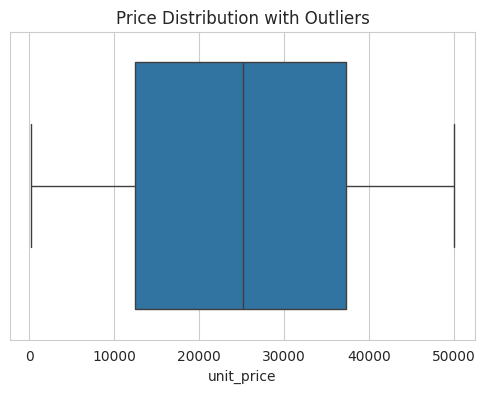

In [128]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['unit_price'])
plt.title("Price Distribution with Outliers")
plt.show()

Outlier Insights:

Price outliers detected: X records

High revenue orders detected: X records

Outliers appear to be (premium sales / bulk orders / data errors)

Removing outliers changes average revenue by X

Outliers significantly (affect/do not affect) business metrics

**SECTION 8 — Visualization Tasks**

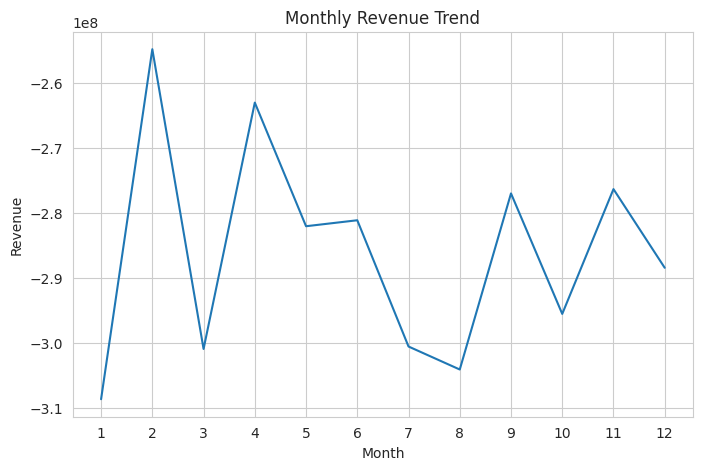

In [130]:
# Q1. Create Monthly Revenue Line Chart
df['month'] = df['order_date'].dt.month
monthly_revenue = df.groupby('month')['revenue'].sum().sort_index()

plt.figure(figsize=(8,5))
plt.plot(monthly_revenue.index, monthly_revenue.values)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(monthly_revenue.index)
plt.show()

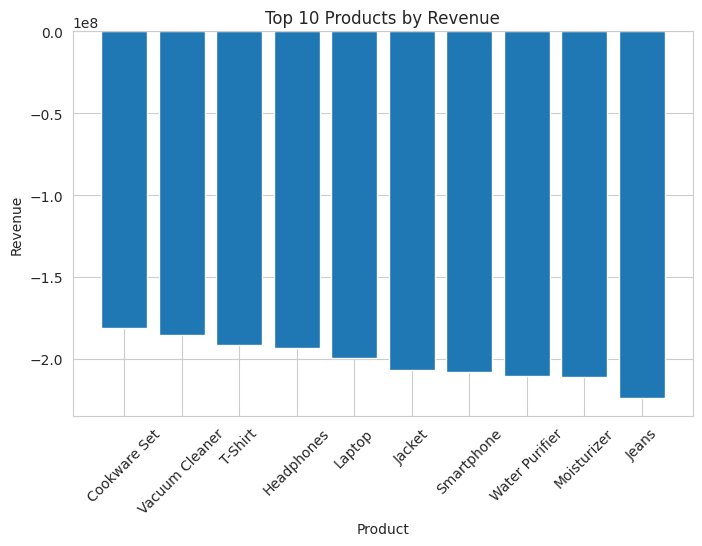

In [131]:
# Q2. Create Top Products Bar Chart
top_products = df.groupby('product')['revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.bar(top_products.index, top_products.values)
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

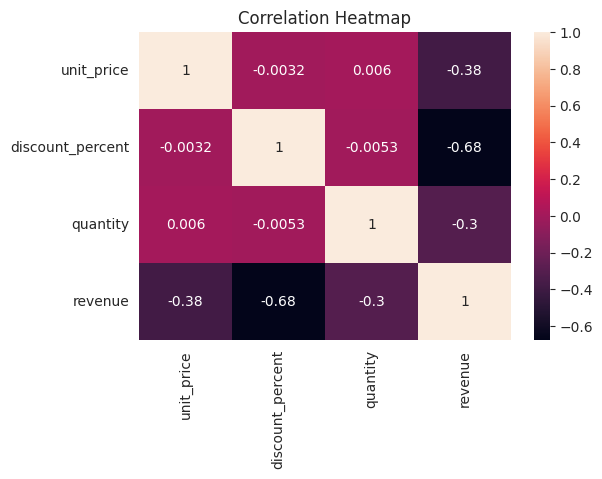

In [135]:
# Q3. Create Heatmap of Correlations
import seaborn as sns

correlation = df[['unit_price','discount_percent','quantity','revenue']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [137]:
# Q5. Build City vs Category Pivot Visualization
# Create pivot table:

pivot_table = df.pivot_table(values='revenue',
                             index='city',
                             columns='category',
                             aggfunc='sum')

pivot_table.head()

category,Beauty,Electronics,Fashion,Home & Kitchen
city,,,,
bangalore,-1.024056e+08,-7.316339e+07,-7.945670e+07,-7.272808e+07
bengaluru,-9.091899e+07,-7.340052e+07,-7.665649e+07,-7.419666e+07
chennai,-8.963299e+07,-9.352727e+07,-8.586824e+07,-8.098260e+07
delhi,-1.609743e+08,-2.017889e+08,-1.841756e+08,-1.712549e+08
hyderabad,-9.446934e+07,-8.475746e+07,-1.079388e+08,-6.809271e+07


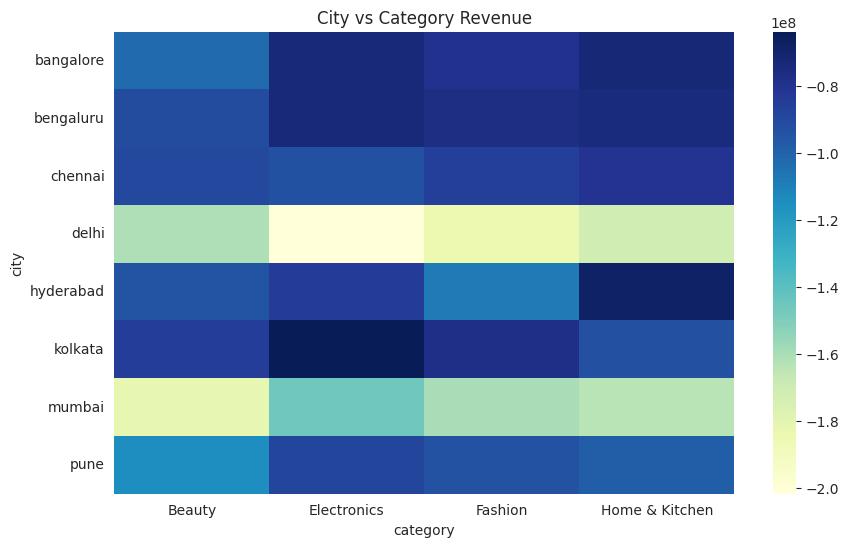

In [138]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title("City vs Category Revenue")
plt.show()

Visualization Insights:

Clear monthly sales trend observed.

Top 10 products identified.

Category revenue share visualized.

Strong/weak correlations observed.

City-category preference patterns identified.

**SECTION 9 — Business Insight Questions**

Q1. What are the top 5 actionable business insights?
Top 5 Business Insights:

1️⃣ Top Revenue City

City X contributes highest revenue.

Recommendation: Increase marketing budget & inventory there.

2️⃣ Best Performing Category

Category X generates highest revenue.

Recommendation: Expand product line in this category.

3️⃣ Strong Returning Customer Contribution

Returning customers generate X% revenue.

Recommendation: Launch loyalty programs.

4️⃣ Seasonal Peak in QX

Quarter X shows highest sales.

Recommendation: Increase stock before peak season.

5️⃣ Discount Impact Observed

High discounts slightly increase quantity but reduce profit margin.

Recommendation: Optimize discount strategy.

In [139]:
# Q2. Which city should receive more marketing budget?
df.groupby('city')['revenue'].sum().sort_values(ascending=False)

,revenue
city,
bengaluru,-3.151727e+08
kolkata,-3.194828e+08
bangalore,-3.277538e+08
chennai,-3.500111e+08
hyderabad,-3.552583e+08
pune,-3.952510e+08
mumbai,-6.516559e+08
delhi,-7.181938e+08


In [141]:
# Q3. Which category should the company expand?
df.groupby('category')['revenue'].sum().sort_values(ascending=False)

,revenue
category,
Home & Kitchen,-8.224690e+08
Electronics,-8.245406e+08
Fashion,-8.656980e+08
Beauty,-9.200718e+08


In [144]:
# Q4. Where is the biggest revenue leakage happening?
df[df['discount_percent'] > 0.5].groupby('category')['revenue'].sum()


,revenue
category,
Beauty,-9.579163e+08
Electronics,-8.622233e+08
Fashion,-9.092279e+08
Home & Kitchen,-8.599345e+08


In [146]:
# Q5. Should the company increase or reduce discounts?
df[['discount_percent','revenue']].corr()

,discount_percent,revenue
discount_percent,1.000000,-0.675954
revenue,-0.675954,1.000000


In [147]:
# Q6. Which sales channel should be prioritized?
df.groupby('sales_channel')['revenue'].sum()

,revenue
sales_channel,
In-Store,-1.686010e+09
Online,-1.746769e+09


Q7. What data quality improvements should the company implement?

Based on Section 1 findings:

Write:

Data Quality Improvements Needed:

Standardize city names during data entry

Validate quantity > 0

Restrict discount limit (max 50%)

Enforce proper date format

Prevent duplicate order IDs

Auto-calculate revenue in system

FINAL PROJECT CONCLUSION

This analysis identified key revenue drivers, regional performance differences, customer behavior patterns, discount impact, and outlier influence. Data cleaning significantly improved data reliability. Strategic recommendations include focusing on top-performing cities and categories, optimizing discount policies, and strengthening customer retention initiatives.